In [2]:
#necessary imports
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense
from keras.datasets import imdb
from keras.preprocessing import sequence
import matplotlib.pyplot as plt

In [3]:
#setting max word range
max_word_range = 10000

In [5]:
#loading imdb dataset
(input_train, output_train), (input_test, output_test) = imdb.load_data(num_words=max_word_range)

17464789/17464789 [==============================] - 0s 0us/step


In [6]:
print(len(input_train), 'train sequences.')
print(len(input_test), 'test sequences.')
max_word_amount = 500

25000 train sequences.
25000 test sequences.


In [7]:
#padding and truncating
input_train = sequence.pad_sequences(input_train, maxlen=max_word_amount)
input_test = sequence.pad_sequences(input_test, maxlen=max_word_amount)

In [8]:
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [9]:
#model architecture
model = Sequential([
  Embedding(max_word_range, 32, input_length=max_word_amount),
  LSTM(32),
  Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
#model compilation
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
#model training
history = model.fit(input_train, output_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 71s 437ms/step - loss: 0.5933 - accuracy: 0.6759 - val_loss: 0.4213 - val_accuracy: 0.8194
Epoch 2/10
157/157 [==============================] - 58s 367ms/step - loss: 0.3549 - accuracy: 0.8541 - val_loss: 0.3254 - val_accuracy: 0.8646
Epoch 3/10
157/157 [==============================] - 57s 366ms/step - loss: 0.2719 - accuracy: 0.8923 - val_loss: 0.2869 - val_accuracy: 0.8838
Epoch 4/10
157/157 [==============================] - 74s 474ms/step - loss: 0.2298 - accuracy: 0.9137 - val_loss: 0.3043 - val_accuracy: 0.8738
Epoch 5/10
157/157 [==============================] - 60s 380ms/step - loss: 0.1945 - accuracy: 0.9281 - val_loss: 0.2985 - val_accuracy: 0.8862
Epoch 6/10
157/157 [==============================] - 64s 405ms/step - loss: 0.1774 - accuracy: 0.9356 - val_loss: 0.3182 - val_accuracy: 0.8636
Epoch 7/10
157/157 [==============================] - 63s 402ms/step - loss: 0.1591 - accuracy: 0.9436 - val_loss: 0.3441 - val_ac

In [15]:
#Extracting Training History
loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
epochs = range(len(loss))

782/782 [==============================] - 38s 49ms/step - loss: 0.4386 - accuracy: 0.8589


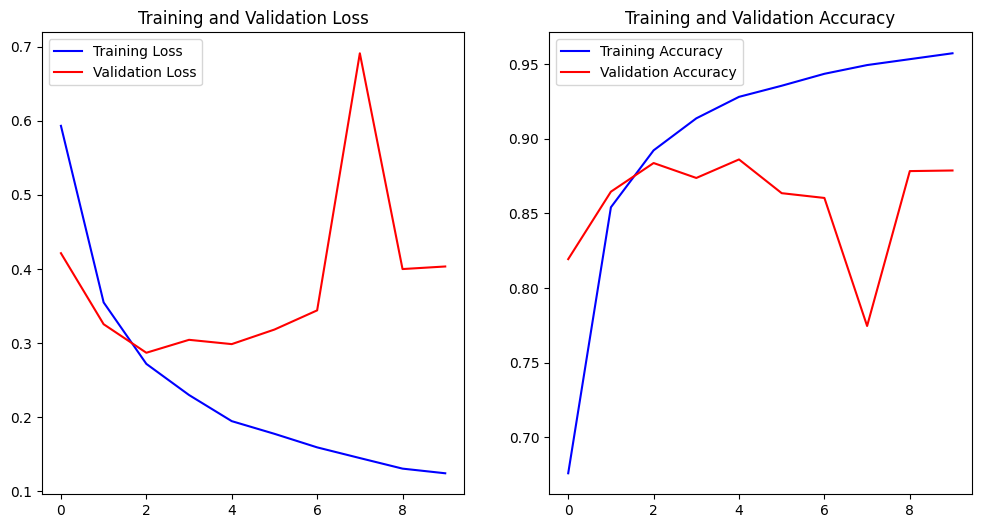

In [17]:
#plotting training and validation metrics
f, axarr = plt.subplots(1, 2, figsize=(12, 6))
p0 = axarr[0]
p1 = axarr[1]
p0.set_title("Training and Validation Loss")
p1.set_title("Training and Validation Accuracy")

p0l0 = p0.plot(epochs, loss, "-b", label="Training Loss")
p0l1 = p0.plot( epochs, val_loss, "-r", label="Validation Loss")

p1l0 = p1.plot(epochs, acc, "-b", label="Training Accuracy")
p1l1 = p1.plot(epochs, val_acc, "-r", label="Validation Accuracy")
#adding legends
legend0 = p0.legend()
legend1 = p1.legend()
#model evaluation on test data
score = model.evaluate(input_test, output_test)

In [18]:
#Printing Test Loss and Accuracy
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])
#Making Predictions and Comparing with True Labels
predictions = model.predict(input_test[0:5])
true_labels = output_test[0:5]
print("0 is a negative comment, 1 is a positive comment.")

for i in range(len(predictions)):
  print("Prediction:", int(round(predictions[i][0])), ",",
        "True Label:", true_labels[i])

Test Loss: 0.4386318624019623
Test Accuracy: 0.8588799834251404
1/1 [==============================] - 0s 480ms/step
0 is a negative comment, 1 is a positive comment.
Prediction: 0 , True Label: 0
Prediction: 1 , True Label: 1
Prediction: 1 , True Label: 1
Prediction: 1 , True Label: 0
Prediction: 1 , True Label: 1
